**Titanic Dataset**

I have chosen a dataset that contains information about passengers on the Titanic and 
whether these selected passengers survived or not. The idea is to examine patterns in 
the dataset and see if there were any correlations between the attributes of the survivors 
and non-survivors, such as age, class, etc. which I am going to use to try and predict whether
a passenger survived the disaster or not.


**Preprocessing and Exploratory Data Analysis**

Some data preprocessing may be required before I start training my models, as there might be categorical data that needs to be converted into numerical values, missing data, or null values that need to be handled by replacing them with appropriate values such as mean/median values. So, I'll start with some preprocessing!

I'll begin by:

    Loading the data.
    Preparing the data.

In [1]:
# Import the libraries
# Load the data
# Explore the data

import numpy as np
import pandas as pd

df_train = pd.read_csv('train_titanic1111.csv')

df_test = pd.read_csv('test_titanic1111.csv')

df = pd.concat([df_train, df_test], axis=0)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# I'm checking how many null values the dataset contains and in which columns they exist.
# Here we can see that "Age" contains 177 null values. We'll replace them with the median age. 
# but before I do that, I want to see if there is any correlation between the null values and the target variable (Survived).
# For example, if the null values are overrepresented among those who did not survive. That could indicate something.


df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [4]:
# Before I decide how to handle the null values in the Age column, I want to see if there is any correlation between Age and Survived.
# I'm going to do this by creating a new dataframe with only the rows that contain null values in the Age column and then join that
# dataframe with the Survived column. Then I'm going to count the number of survivors and non-survivors in the new dataframe.

age_null = df[df['Age'].isnull()]

joined_data = age_null[['Survived', 'Age']]

survived_counts = joined_data['Survived'].value_counts()

print(survived_counts)

0.0    125
1.0     52
Name: Survived, dtype: int64


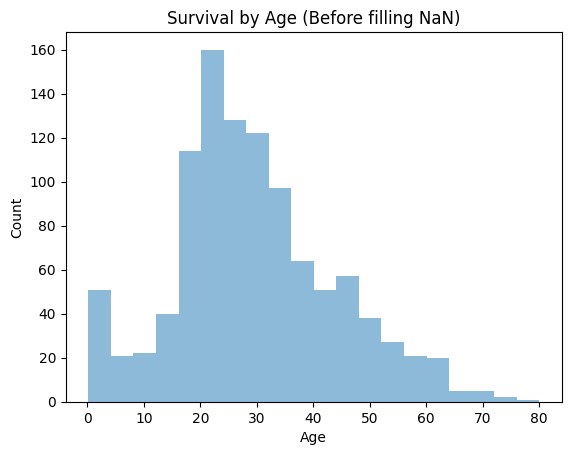

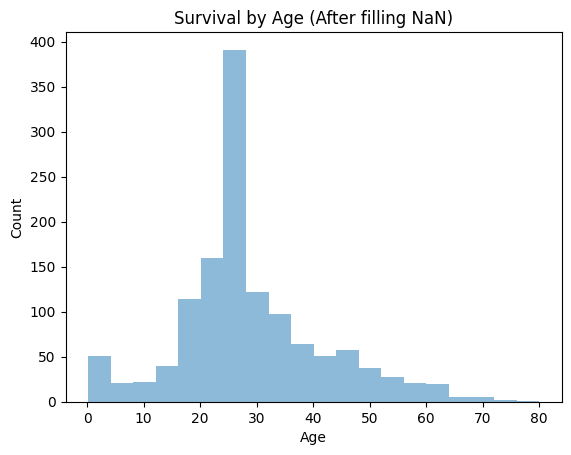

In [5]:
# Here I could see that maybe there could be a connection. It's more than twice as many who did not survive among those who lack age.
# I want to examine this a bit deeper

# # We try to make our NaN values in Age to the median value for the age of the other passengers and see if it has a big impact.

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for Age against survival feature (before filling NaN values)
plt.hist(df['Age'], bins=20, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival by Age (Before filling NaN)')
plt.show()

# Fill NaN values in Age with the mean value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filter the data for survivors
survived = df[df['Survived'] == 1]

# Plot histogram for Age against survival feature (after filling NaN values)
plt.hist(df['Age'], bins=20, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival by Age (After filling NaN)')
plt.show()

In [6]:
# Our survival by age number just went through the roof, but the distribution looks pretty similiar except for the spike in the middle so I'll keep this change.


In [7]:
# Lets do some feature engineering. We'll start by creating a column called FamilySize that contains the number of family members on board for each passenger
# and in that way we can drop the SibSp and Parch columns. Then we can create a column named HasCabin that contains 1 if the passenger has a cabin and 0 if not.
# The information from the Name column is also interesting because we can see if the passenger is married or not and that could have impact on the survival rate.
# So well create a column called married that contains the information from the Name column.

In [8]:
# Make my SibSp and Parch columns into one column called FamilySize and drop SibSp and Parch


df['FamilySize'] = df['SibSp'] + df['Parch']

df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [9]:
# The Embarked column also had some NaN values
# Inspect which category in Embarked has the most passengers

df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [10]:
# Embarked also contains null values. There are not so many so I think I can replace them with the mean value and also make the column numeric.

df["Embarked"] = df.Embarked.fillna("S")

df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

embarked_mean = df['Embarked'].mean()

df['Embarked'] = df['Embarked'].fillna(embarked_mean)

In [11]:
# We can aldready see in the first five rows of the dataset that there is missing data about cabin number. It can be interpreted in different ways.
# It can mean that the person in question could not afford a cabin, was a worker on the boat and was not assigned a cabin or
# the information is simply missing whether the person lived in a cabin or not. The cabin number could also mean something for the survival rate
# because maybe the most expensive cabins were strategically located near the lifeboats. But this we will not take into account in this project
# becuase then I have to nerd down in some bluepreints over the Titanic and Im am aboslutely not going to do that! So I will create a column called
# HasCabin that contains 1 if the passenger has a cabin and 0 if not.

~df['Cabin'].isnull()

df["Has_Cabin"] = ~df['Cabin'].isnull()

df["Has_Cabin"] = df["Has_Cabin"].astype(int)

df.drop(['Cabin'], axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Has_Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,3,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,3,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,3,1,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,3,0,0


In [12]:

# PassengerId column is irrelevant for my predictions so I drop it. 
# Till fill the Fare column with the median value and will handle the categorical values in the Sex feature by making them numerical where 1 is for male and 0 is for female


df = df.drop(['PassengerId'], axis=1)

fare_median = df['Fare'].median()

df['Fare'] = df['Fare'].fillna(fare_median)

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})


In [13]:
# Lets look at the Name column

df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [14]:
# If we are going to use the name column for something it should be if the person is married or not. Lets see if this could provide us with valuable information
# when we plot it against the target variable. So lets create a new column called Married and set it to 1 if the person is married and 0 if not.

# Create a new column 'Married' based on the 'Name' column
df['Married'] = 0  # Initialize all values to 0

# Set 'Married' to 1 if 'Mr' or 'Mrs' is present in the name
df.loc[df['Name'].str.contains('Mr\.|Mrs\.'), 'Married'] = 1

# Print a sample of the modified DataFrame
print(df[['Name', 'Married']].head(10))


                                                Name  Married
0                            Braund, Mr. Owen Harris        1
1  Cumings, Mrs. John Bradley (Florence Briggs Th...        1
2                             Heikkinen, Miss. Laina        0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)        1
4                           Allen, Mr. William Henry        1
5                                   Moran, Mr. James        1
6                            McCarthy, Mr. Timothy J        1
7                     Palsson, Master. Gosta Leonard        0
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)        1
9                Nasser, Mrs. Nicholas (Adele Achem)        1


In [15]:
# Now we can drop our Name column

df = df.drop(['Name'], axis=1)

In [16]:
df.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
Ticket          0
Fare            0
Embarked        0
FamilySize      0
Has_Cabin       0
Married         0
dtype: int64

In [17]:
df.shape

(1309, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   int64  
 3   Age         1309 non-null   float64
 4   Ticket      1309 non-null   object 
 5   Fare        1309 non-null   float64
 6   Embarked    1309 non-null   int64  
 7   FamilySize  1309 non-null   int64  
 8   Has_Cabin   1309 non-null   int32  
 9   Married     1309 non-null   int64  
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 107.4+ KB


In [19]:
df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Has_Cabin,Married
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.644003,29.503186,33.281086,2.493506,0.883881,0.225363,0.728801
std,0.486592,0.837836,0.478997,12.905241,51.741500,0.814244,1.583639,0.417981,0.444749
min,0.000000,1.000000,0.000000,0.170000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.895800,2.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,3.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.275000,3.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,3.000000,10.000000,1.000000,1.000000


In [20]:
# Save data to a variable we will use for feature selection later in the program 

feature_selection = df.head(891)

In [21]:
# Here we can see that the socioeconomic status (Pclass) is overrepresented on the boat. There are more who took 3rd class than 1st and 2nd class together.
# The average age of the passengers on the boat was 29 years.

**Plotting**

We continue our exploratory data analysis by visualizing the data with some nice plots and hope
that we can see a deeper pattern between our target and our features.

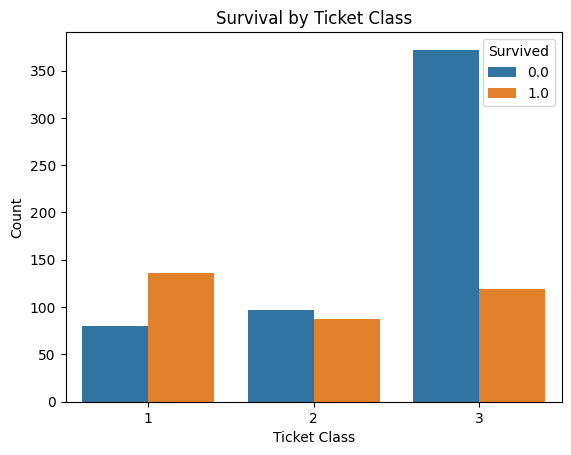

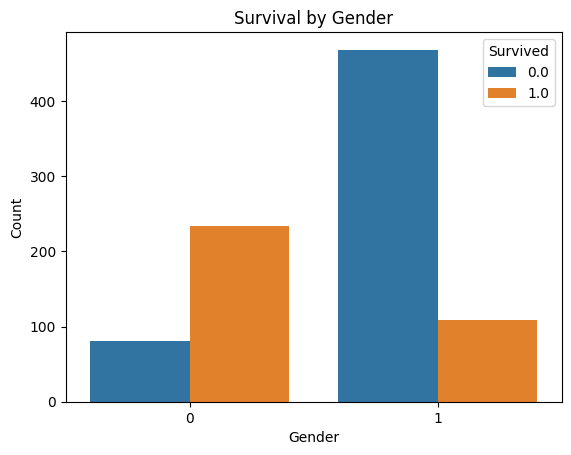

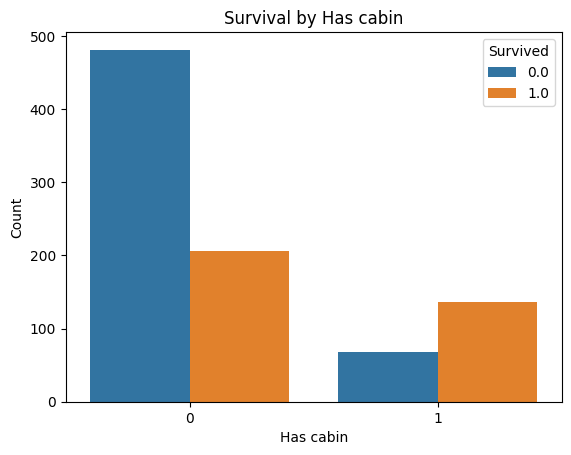

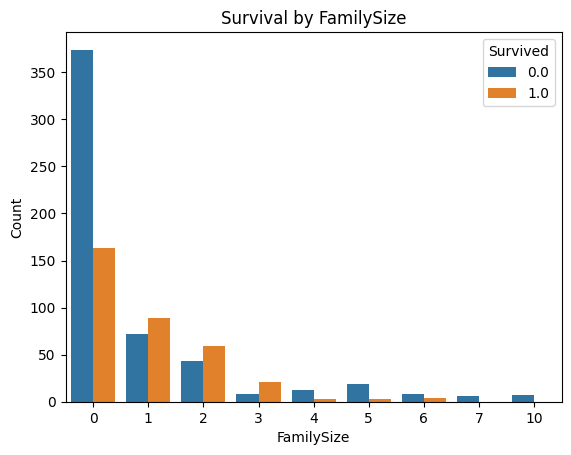

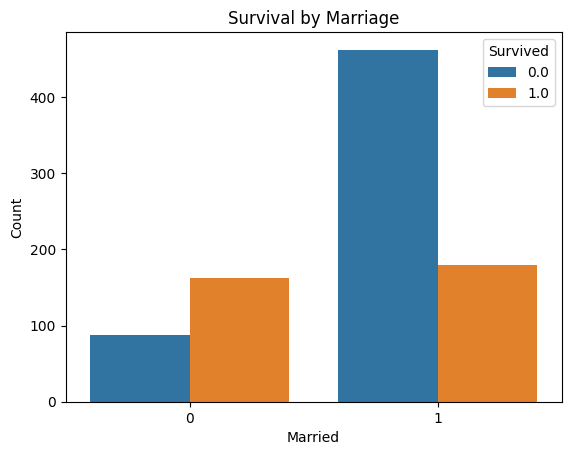

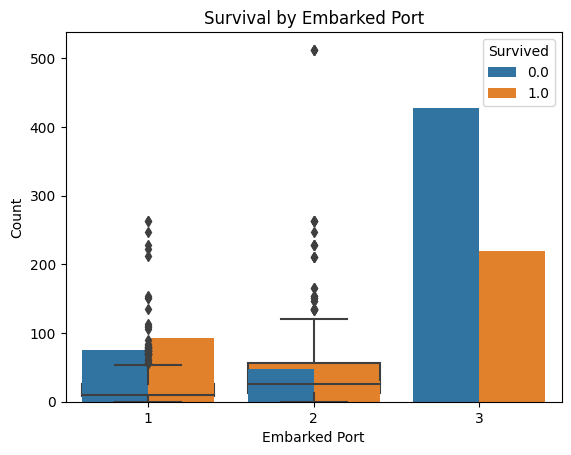

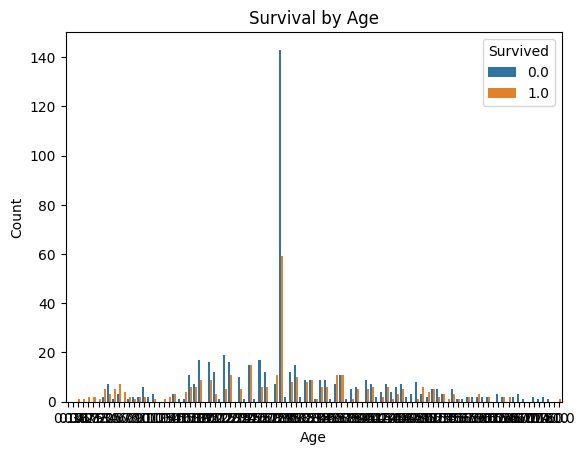

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping values to labels
sex_mapping = {0: 'Women', 1: 'Men'}
survived_mapping = {0: 'Not Survived', 1: 'Survived'}

# Make a temporary copy of our dataframe
df_temp = df.copy()



# Rest of your plots using the original dataframe (df1)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.title('Survival by Ticket Class')
plt.show()

# Rest of your plots using the original dataframe (df1)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.show()

sns.countplot(data=df, x='Has_Cabin', hue='Survived')
plt.xlabel('Has cabin')
plt.ylabel('Count')
plt.title('Survival by Has cabin')
plt.show()

sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.xlabel('FamilySize')
plt.ylabel('Count')
plt.title('Survival by FamilySize')
plt.show()

# Rest of your plots using the original dataframe (df1)
sns.countplot(data=df, x='Married', hue='Survived')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Survival by Marriage')
plt.show()

sns.boxplot(data=df, x='Survived', y='Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Survival by Fare')


sns.countplot(data=df, x='Embarked', hue='Survived')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.title('Survival by Embarked Port')
plt.show()

sns.countplot(data=df, x='Age', hue='Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival by Age')
plt.show()



** Ticket class **

The ticket class plot is interesting. It shows that the passengers who had a 1st class ticket had a higher survival rate than the others and 
the 3rd ticket class had the most non survivors. This could mean that socioeconomic status was an important factor for survival. Maybe the 1st
class passengers were given priority to the lifeboats.

** Gender **

There were nearly 200 more men on board than women and twice as many women than men survived. It could be an indicator that women and children 
were prioritized to the seats of the lifeboats. It could also be an indicator that there is no evil patriarchy which rules the world.

** Has Cabin **

The ones without information of cabin is overrepresented in the non survivors. This could mean that those who lack information about having a cabin,
really didnt have a cabin, because the couldnt afford it. This could strengthen our theory of scoioeconomic relevance.

** FamilySize **

The smaller the family they greater chance of surviving and not surviving. This was a weird plot. That the chances of survival is greater with no family than with
family I can understand because you dont have to keep track of children or wait for someone else. But that NoN survivals is overrepresented there maybe indicates 
that some passengers with no family left their seat for familys.

** Marriage **

Thos who were married had less chances of surviving. That could mean the they couldnt leave eachother behind and in all the panic and hysteria they searched 
for eachother and didnt find eachother.

** Embarked port **

Southhampton seems to be the town of both unlucky and lucky people. The passengers who made their embarkation there are both overrepresented in survival and non survival.
It was the ships first port of departure so my theory of the non survivals is that they've had time to make themselves comfortable by embarking first. They had taken
their luggade to their cabin, had a nice meal and maybe som drinks and then went to bed. So maybe when disaster struck they were sleeping. But the survivors is also
a high number here so maybe they were the ones who did not drink wine and fall asleep.

** Age **

The highest number of survivors is in the age group 20-30 years and the highest number of non-survivors is also in the age group 20-30 years.
Why is that? Maybe the young people were more agile and could get to the lifeboats faster. But it seems maybe the 20-30 year olds were 
splitted into two groups. One with empathy and one with pure self-preservation so
the ones with empathy helped the old people, women and children to the lifeboats while the self-preservation group elbowed their way forward to the 
lifeboats.




In [23]:
# The last EDA we are going to do is try and see if there are any correlations between our features on a heatmap

C:\Users\Kaliber\AppData\Local\Temp\ipykernel_12452\4274386890.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


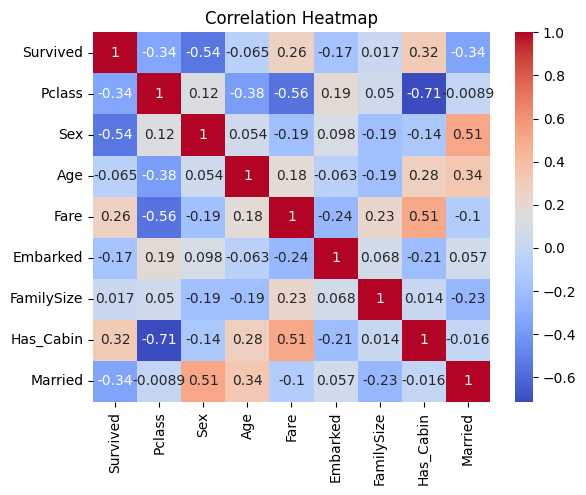

In [24]:
# Correlation Heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [25]:
# I can unfortunately not see much correlation between our features and our target besides Sex, Pclass, Married and Has_cabin.
# But the spike in the Age plot is interesting so I am saving Age too.
# I am going to drop some more columns.

df = df.drop(['FamilySize', 'Embarked', 'Fare', 'Ticket'], axis=1)



In [26]:
X_train = df.head(891).drop(['Survived'], axis=1)

y_train = df['Survived'].head(891)
X_test = df.tail(418)
X_test.drop(['Survived'], axis=1, inplace=True)
X_test

C:\Users\Kaliber\AppData\Local\Temp\ipykernel_12452\289737631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['Survived'], axis=1, inplace=True)


,Pclass,Sex,Age,Has_Cabin,Married
0,3,1,34.5,0,1
1,3,0,47.0,0,1
2,2,1,62.0,0,1
3,3,1,27.0,0,1
4,3,0,22.0,0,1
...,...,...,...,...,...
413,3,1,28.0,0,1
414,1,0,39.0,1,0
415,3,1,38.5,0,1
416,3,1,28.0,0,1


In [27]:
# Our features are on different scales. For example, Sex is binary and Age is up over 80.
# This could affect our results negatively. We should therefore normalize the data.
# For potentially better results, we should normalize the data so that all values are between 0 and 1
# This means that all values will be on the same scale even if the first value in a feature is 5 billion and the first value in another feature is 0.1
# So both values will be between 0 and 1 but still retain their relative difference and their relative position in the data.
# We should not normalize any other features than the Age feature here because the other features are already in small numbers.


from sklearn.preprocessing import StandardScaler

# Select the column to be scaled
column_to_scale = 'Age'

# Create a copy of the DataFrame
df_scaled = X_train.copy()

# Apply scaling to the selected column using StandardScaler
scaler = StandardScaler()
X_train[column_to_scale] = scaler.fit_transform(X_train[[column_to_scale]])

# Create a copy of the DataFrame
df_scaled1 = X_test.copy()

# Apply scaling to the selected column using StandardScaler
scaler = StandardScaler()
X_test[column_to_scale] = scaler.fit_transform(X_test[[column_to_scale]])

C:\Users\Kaliber\AppData\Local\Temp\ipykernel_12452\169482338.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column_to_scale] = scaler.fit_transform(X_test[[column_to_scale]])


In [28]:
# The scaling seems to have worked fine


print(X_test)

print(X_train)

     Pclass  Sex       Age  Has_Cabin  Married
0         3    1  0.371062          0        1
1         3    0  1.358985          0        1
2         2    1  2.544493          0        1
3         3    1 -0.221692          0        1
4         3    0 -0.616861          0        1
..      ...  ...       ...        ...      ...
413       3    1 -0.142658          0        1
414       1    0  0.726714          1        0
415       3    1  0.687197          0        1
416       3    1 -0.142658          0        1
417       3    1 -0.142658          0        0

[418 rows x 5 columns]
     Pclass  Sex       Age  Has_Cabin  Married
0         3    1 -0.565736          0        1
1         1    0  0.663861          1        1
2         3    0 -0.258337          0        0
3         1    0  0.433312          1        1
4         3    1  0.433312          0        1
..      ...  ...       ...        ...      ...
886       2    1 -0.181487          0        0
887       1    0 -0.796286          

**Training models**

So far we have inspected, handled and analyzed our data so now its time to start creating our modells and train them with our training data.

Choice of model :

I am going to try and predict whether the passenger survived or died based on all my selected features from the dataset.
This task is best performed by a classification-algorithm because we have a binary output we are going to classify as 
either or.

**Training our first model**

We use RandomForesClassifier and DecisionTreeClassifier on our train and test data

To evaluate our model we use :

    - MSE - Mean squared error, the lower the better
    - MAE - Mean absolute error, the lower the better
    - CV - Cross validation (K-fold), the higher the better

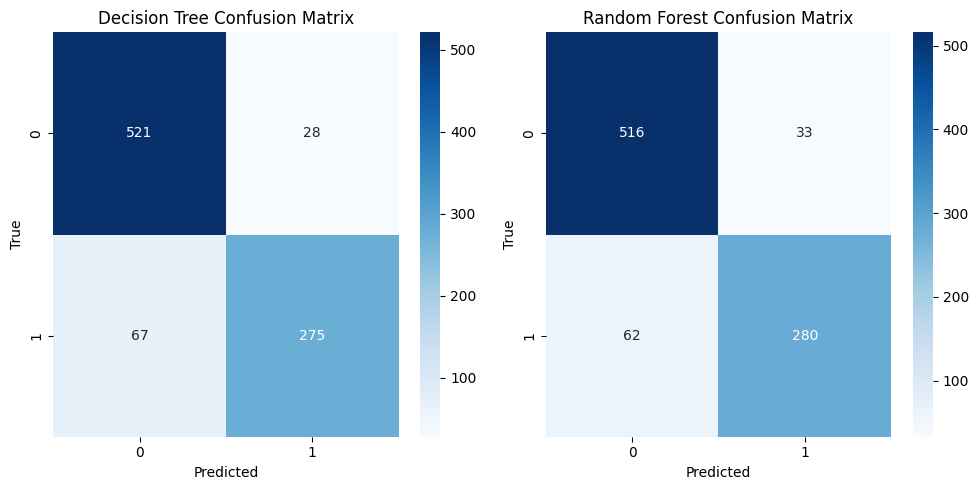

Decision Tree - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       549
         1.0       0.91      0.80      0.85       342

    accuracy                           0.89       891
   macro avg       0.90      0.88      0.88       891
weighted avg       0.89      0.89      0.89       891

Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       549
         1.0       0.89      0.82      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.88      0.89       891
weighted avg       0.89      0.89      0.89       891



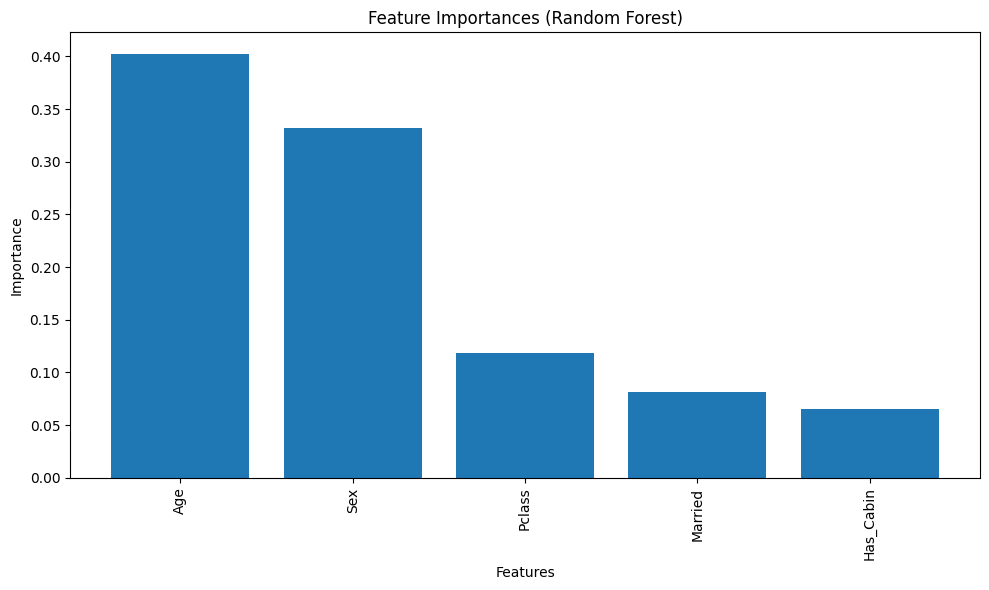

Decision Tree - Cross-validation scores: [0.78212291 0.78651685 0.81460674 0.79775281 0.8258427 ]
Decision Tree - Mean cross-validation score: 0.8013684012303056
Random Forest - Cross-validation scores: [0.77094972 0.79213483 0.81460674 0.81460674 0.79775281]
Random Forest - Mean cross-validation score: 0.7980101688531793
Predictions on the test set :
DecisionTreeClassifier Survivals count: 149 out of 418
RandomForestClassifier Survivals count: 154 out of 418


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None)

# Fit the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Perform cross-validation
cross_val_scores_decision_tree = cross_val_score(decision_tree, X_train, y_train, cv=5)
cross_val_scores_random_forest = cross_val_score(random_forest, X_train, y_train, cv=5)

# Confusion Matrix
confusion_mat_decision_tree = confusion_matrix(y_train, decision_tree.predict(X_train))
confusion_mat_random_forest = confusion_matrix(y_train, random_forest.predict(X_train))

# Plot Confusion Matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat_decision_tree, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat_random_forest, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

# Classification Report
print("Decision Tree - Classification Report:")
print(classification_report(y_train, decision_tree.predict(X_train)))

print("Random Forest - Classification Report:")
print(classification_report(y_train, random_forest.predict(X_train)))

# Feature Importance Plot (for Random Forest)
importances = random_forest.feature_importances_
feature_names = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Print Cross-Validation Scores
print("Decision Tree - Cross-validation scores:", cross_val_scores_decision_tree)
print("Decision Tree - Mean cross-validation score:", cross_val_scores_decision_tree.mean())

print("Random Forest - Cross-validation scores:", cross_val_scores_random_forest)
print("Random Forest - Mean cross-validation score:", cross_val_scores_random_forest.mean())

# Test the Decision Tree Classifier on the test set
decision_tree_predictions = decision_tree.predict(X_test)

# Test the Random Forest Classifier on the test set
random_forest_predictions = random_forest.predict(X_test)

survivals_count = np.count_nonzero(decision_tree_predictions == 1)
non_survivals_count = np.count_nonzero(decision_tree_predictions == 0)

survivals_count1 = np.count_nonzero(random_forest_predictions == 1)
non_survivals_count1 = np.count_nonzero(random_forest_predictions == 0)


# Display the counts
print("Predictions on the test set :")
print("DecisionTreeClassifier Survivals count:", survivals_count, "out of 418")

print("RandomForestClassifier Survivals count:", survivals_count1, "out of 418")


This was a very good start! We got pretty high numbers on both our models on our cross validation score!

So far the DecisionTree is in the lead with : 521 TP 275 TN 67 FN 28 FP

Its also interesting to see that the Age feature went up to most important feature here. On the heatmap it showed 0.06 correlation.

According to the DecisionTreeClassifier there were 148 who survived out of 418 in the test set

According to the RandomForestClassifier there were 166 who survived out of 418 in the test set

Now we try and do the same thing but with GridSearchCV to find the best hyperparameters

The predictions on the test set was :

DecisionTreeClassifier Survivals count: 149 out of 418
RandomForestClassifier Survivals count: 154 out of 418

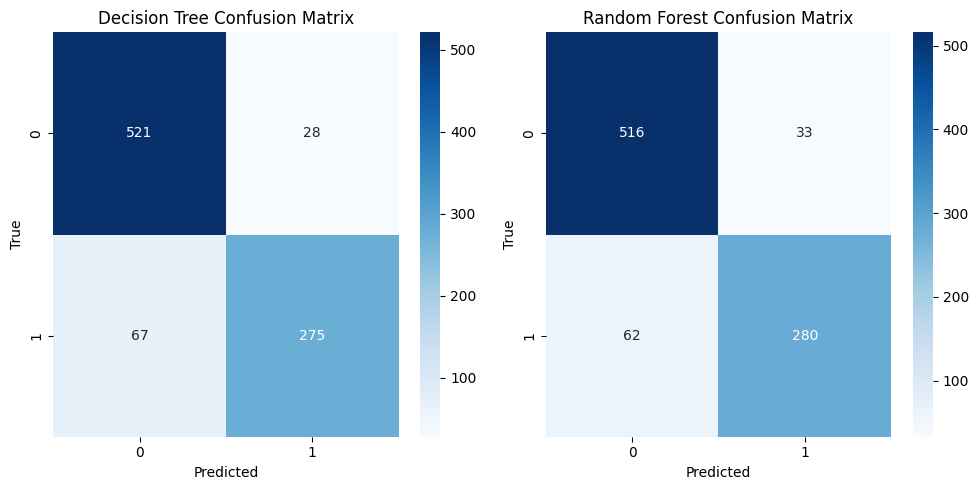

Decision Tree - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       549
         1.0       0.91      0.80      0.85       342

    accuracy                           0.89       891
   macro avg       0.90      0.88      0.88       891
weighted avg       0.89      0.89      0.89       891

Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       549
         1.0       0.89      0.82      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.88      0.89       891
weighted avg       0.89      0.89      0.89       891



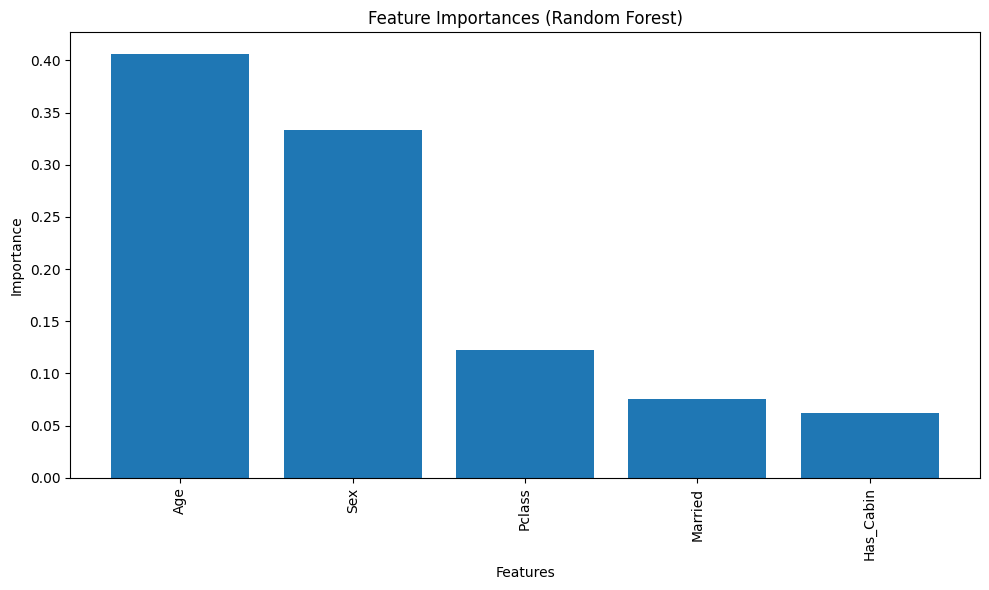

Decision Tree - Cross-validation scores: [0.77653631 0.78651685 0.81460674 0.79775281 0.8258427 ]
Decision Tree - Mean cross-validation score: 0.8002510827945514
Random Forest - Cross-validation scores: [0.77094972 0.79213483 0.79213483 0.80898876 0.82022472]
Random Forest - Mean cross-validation score: 0.7968865733475614
Predictions on the test set :
DecisionTreeClassifier Survivals count: 150 out of 418
RandomForestClassifier Survivals count: 155 out of 418


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Random Forest Classifier
random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=120, num=5)],
    # 'max_depth': [None, 5, 10],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest Classifier
#param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)
random_forest_best = grid_search.best_estimator_

# Fit the models
decision_tree.fit(X_train, y_train)
random_forest_best.fit(X_train, y_train)

# Perform cross-validation
cross_val_scores_decision_tree = cross_val_score(decision_tree, X_train, y_train, cv=5)
cross_val_scores_random_forest = cross_val_score(random_forest_best, X_train, y_train, cv=5)

# Confusion Matrix
confusion_mat_decision_tree = confusion_matrix(y_train, decision_tree.predict(X_train))
confusion_mat_random_forest = confusion_matrix(y_train, random_forest_best.predict(X_train))

# Plot Confusion Matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat_decision_tree, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat_random_forest, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

# Classification Report
print("Decision Tree - Classification Report:")
print(classification_report(y_train, decision_tree.predict(X_train)))

print("Random Forest - Classification Report:")
print(classification_report(y_train, random_forest_best.predict(X_train)))

# Feature Importance Plot (for Random Forest)
importances = random_forest_best.feature_importances_
feature_names = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Print Cross-Validation Scores
print("Decision Tree - Cross-validation scores:", cross_val_scores_decision_tree)
print("Decision Tree - Mean cross-validation score:", cross_val_scores_decision_tree.mean())

print("Random Forest - Cross-validation scores:", cross_val_scores_random_forest)
print("Random Forest - Mean cross-validation score:", cross_val_scores_random_forest.mean())

# Test the Decision Tree Classifier
decision_tree_predictions = decision_tree.predict(X_test)

# Test the Random Forest Classifier
random_forest_predictions = random_forest_best.predict(X_test)

survivals_count = np.count_nonzero(decision_tree_predictions == 1)
non_survivals_count = np.count_nonzero(decision_tree_predictions == 0)

survivals_count1 = np.count_nonzero(random_forest_predictions == 1)
non_survivals_count1 = np.count_nonzero(random_forest_predictions == 0)


# Display the counts
print("Predictions on the test set :")
print("DecisionTreeClassifier Survivals count:", survivals_count, "out of 418")

print("RandomForestClassifier Survivals count:", survivals_count1, "out of 418")



This was not a big difference. I want to try with some other models and see if I can get better results.

DecisionTreeClassifier Survivals count: 150 out of 418
RandomForestClassifier Survivals count: 155 out of 418

## Model selection and Ensemble methods

- Cross validation with k-fold
- Boosting
- Bagging
- Stacking


knn accuracy: 0.8451
knn MAE: 0.1549
knn MSE: 0.1549


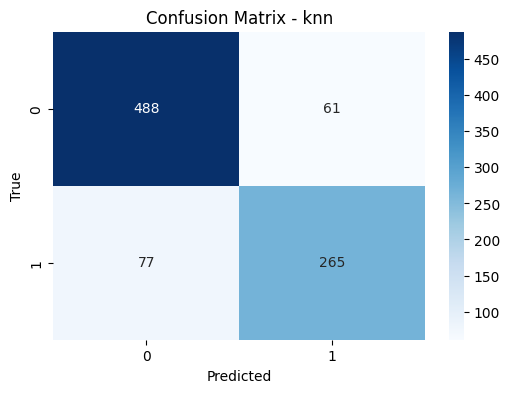

knn cross-validation scores: [0.74860335 0.7752809  0.79213483 0.78651685 0.80898876]
knn mean cross-validation score: 0.7823

gnb accuracy: 0.7778
gnb MAE: 0.2222
gnb MSE: 0.2222


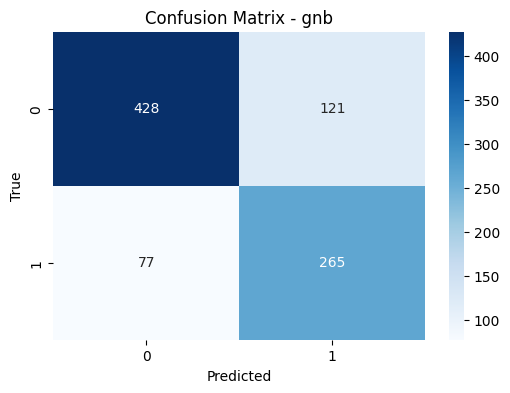

gnb cross-validation scores: [0.76536313 0.73595506 0.76966292 0.80337079 0.80337079]
gnb mean cross-validation score: 0.7755

dt accuracy: 0.8934
dt MAE: 0.1066
dt MSE: 0.1066


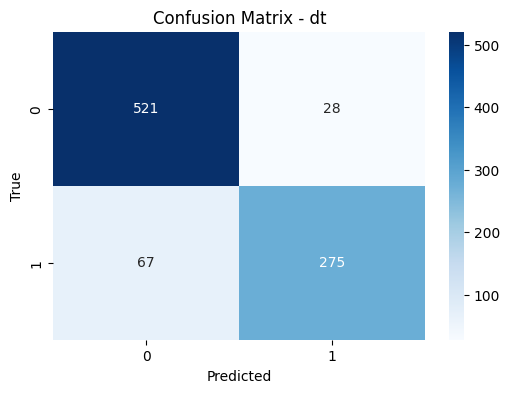

dt cross-validation scores: [0.78212291 0.78089888 0.81460674 0.79213483 0.8258427 ]
dt mean cross-validation score: 0.7991

meta accuracy: 0.7957
meta MAE: 0.2043
meta MSE: 0.2043


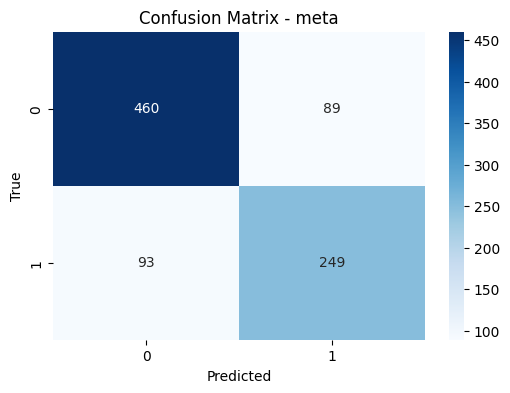

meta cross-validation scores: [0.82122905 0.78089888 0.7752809  0.78089888 0.80898876]
meta mean cross-validation score: 0.7935

bagging accuracy: 0.8855
bagging MAE: 0.1145
bagging MSE: 0.1145


C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


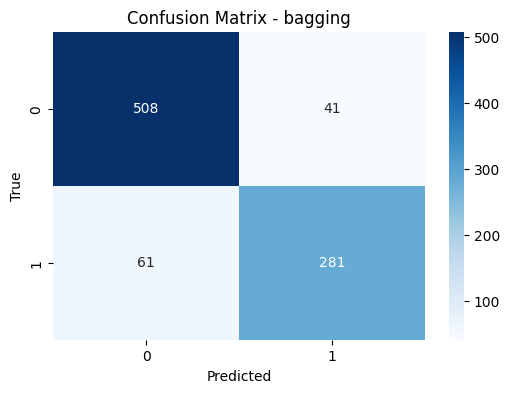

C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\

bagging cross-validation scores: [0.77094972 0.79213483 0.80898876 0.79213483 0.83707865]
bagging mean cross-validation score: 0.8003

boosting accuracy: 0.8934
boosting MAE: 0.1066
boosting MSE: 0.1066


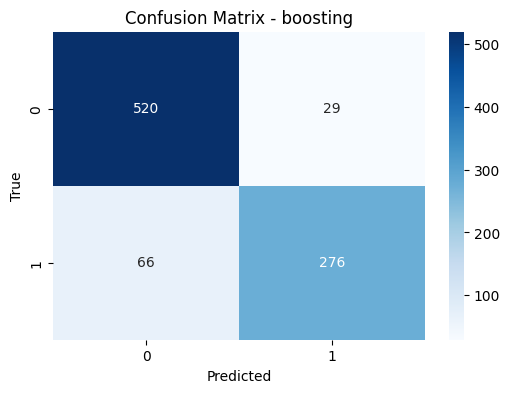

C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Kaliber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\

boosting cross-validation scores: [0.78212291 0.78651685 0.80898876 0.79213483 0.8258427 ]
boosting mean cross-validation score: 0.7991

stack accuracy: 0.8799
stack MAE: 0.1201
stack MSE: 0.1201


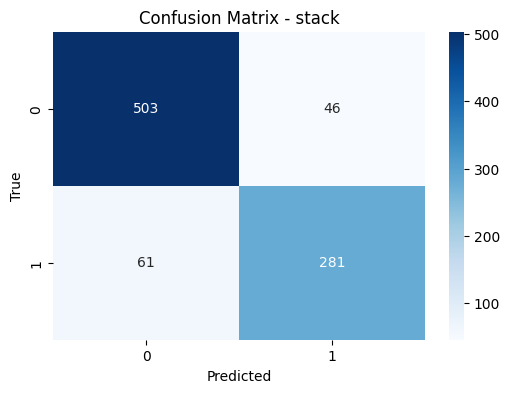

stack cross-validation scores: [0.78212291 0.79213483 0.81460674 0.80337079 0.8258427 ]
stack mean cross-validation score: 0.8036



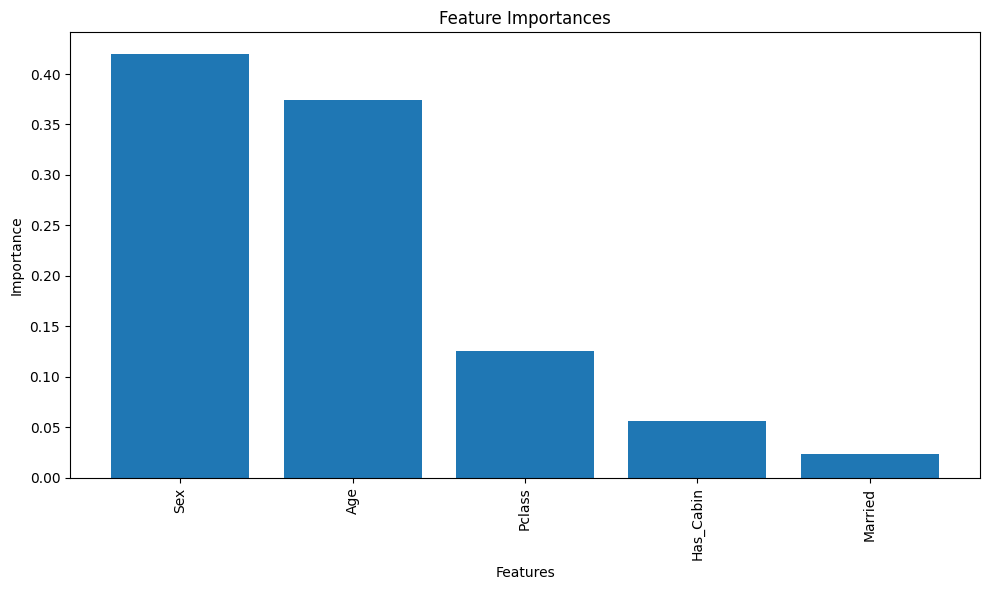

Test set!
According to the stacking model  160.0 out of 418 survived


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the classifiers
clf_knn = KNeighborsClassifier()
clf_gnb = GaussianNB()
clf_dt = DecisionTreeClassifier()
clf_meta = LogisticRegression()

# Create ensemble classifiers
clf_bagging = BaggingClassifier(base_estimator=clf_dt, n_estimators=10, random_state=42)
clf_boosting = AdaBoostClassifier(base_estimator=clf_dt, n_estimators=10, random_state=42)
clf_stack = StackingClassifier(estimators=[('knn', clf_knn), ('gnb', clf_gnb), ('dt', clf_dt)], final_estimator=clf_meta)

# Fit and predict for each classifier
classifiers = [('knn', clf_knn), ('gnb', clf_gnb), ('dt', clf_dt), ('meta', clf_meta), ('bagging', clf_bagging), ('boosting', clf_boosting), ('stack', clf_stack)]
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_train, clf.predict(X_train))
    mae = mean_absolute_error(y_train, clf.predict(X_train))
    mse = mean_squared_error(y_train, clf.predict(X_train))
    print(f"{name} accuracy: {accuracy:.4f}")
    print(f"{name} MAE: {mae:.4f}")
    print(f"{name} MSE: {mse:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_train, clf.predict(X_train))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Cross-validation scores
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"{name} cross-validation scores: {cv_scores}")
    print(f"{name} mean cross-validation score: {np.mean(cv_scores):.4f}")
    print()

# Plot feature importances
feature_importances = clf_dt.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

print("Predictions on the test set!")
print("According to the stacking model ", y_pred.sum(), "out of 418 survived")


Here are the feature importance ranking different from earlier. The Sex feature is the most important one here and seems weigh more in the decisions being made by the algorithm and the age and Pclass column is also important.

According to the stacking model 160 out of 418 Survived in the test set!


**I will try one last thing to try and make a better score. I will make an algorithm decide which of the features that is worth saving.**

In [32]:
feature_selection.drop(['Ticket'], axis=1, inplace=True)

In [33]:
X_selection = feature_selection.drop('Survived', axis=1)
y_selection = feature_selection['Survived']

X_test1 = X_test

In [34]:
# We need to scale again

from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df_scaled = X_selection.copy()

# Apply scaling to the selected column using StandardScaler
scaler = StandardScaler()
X_selection['Age'] = scaler.fit_transform(X_selection[['Age']])
X_selection['Fare'] = scaler.fit_transform(X_selection[['Fare']])


In [35]:
X_selection

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Has_Cabin,Married
0,3,1,-0.565736,-0.502445,3,1,0,1
1,1,0,0.663861,0.786845,1,1,1,1
2,3,0,-0.258337,-0.488854,3,0,0,0
3,1,0,0.433312,0.420730,3,1,1,1
4,3,1,0.433312,-0.486337,3,0,0,1
...,...,...,...,...,...,...,...,...
886,2,1,-0.181487,-0.386671,3,0,0,0
887,1,0,-0.796286,-0.044381,3,0,1,0
888,3,0,-0.104637,-0.176263,3,3,0,0
889,1,1,-0.258337,-0.044381,1,0,1,1


Feature: Pclass Score: 0.07609
Feature: Sex Score: 0.22555
Feature: Age Score: 0.22727
Feature: Fare Score: 0.24781
Feature: Embarked Score: 0.03974
Feature: FamilySize Score: 0.08840
Feature: Has_Cabin Score: 0.04215
Feature: Married Score: 0.05299


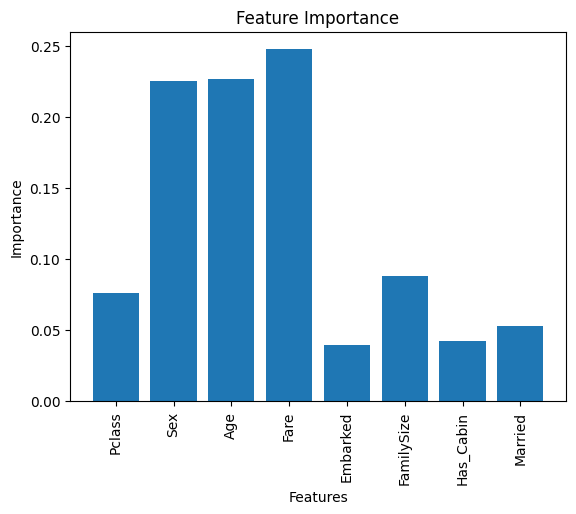

X_train_fs shape: (623, 4) X_train: (623, 8)
X_test_fs shape: (268, 4) X_test: (268, 8)
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       157
         1.0       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       157
         1.0       0.77      0.71      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268

Selected Features:
Sex
Age
Fare
FamilySize


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_selection, y_selection, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

# Print the feature performance with names
for i, v in enumerate(importances):
    print('Feature:', X_selection.columns[i], 'Score: %.5f' % v)

# Plot feature importance with names
plt.bar(X_selection.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Write a function that selects the most important features
def select_features(X_train, y_train, X_test):
    # find a good subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold=0.08)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    print("X_train_fs shape:", X_train_fs.shape, "X_train:", X_train.shape)
    X_test_fs = fs.transform(X_test)
    print("X_test_fs shape:", X_test_fs.shape, "X_test:", X_test.shape)
    return X_train_fs, X_test_fs, fs

# Run the function
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_fs, y_train)

y_pred = rf.predict(X_test_fs)

print(classification_report(y_test, y_pred))

rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all_features.fit(X_train, y_train)

y_pred_all_features = rf_all_features.predict(X_test)

print(classification_report(y_test, y_pred_all_features))

# Print the feature names for selected features
selected_feature_indices = fs.get_support(indices=True)
selected_feature_names = X_selection.columns[selected_feature_indices]

print("Selected Features:")
for feature_name in selected_feature_names:
    print(feature_name)


Great! We see that our algorithm has chosen the features Familysize, Sex, Age and Fare. The Familysize seems to be more important to this model than the Fare feature.

Lets try these features with the model that has worked best so far : DecisionTreeClassifier 

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters: {'max_depth': 5}
Mean Squared Error (MSE): 0.17537313432835822
Mean Absolute Error (MAE): 0.17537313432835822
Cross-validated scores: [0.792      0.872      0.784      0.77419355 0.85483871]
Mean Cross-validated score: 0.8154064516129033


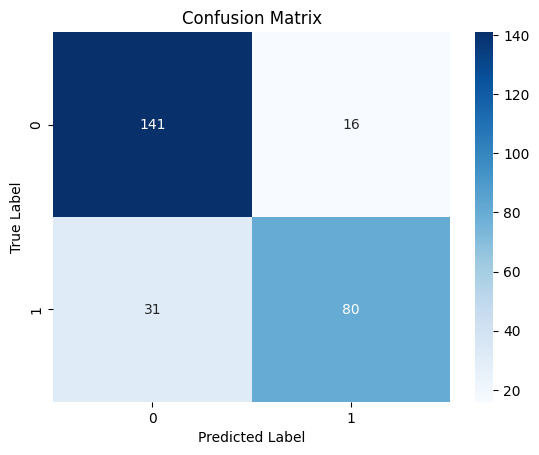

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns

# Define the parameter grid
params_dt = {'max_depth': [None, 5, 10]}

# Create a base model
dt = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid=params_dt, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_fs, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Extract the best parameters
best_params_dt = grid_search.best_params_

# We will now use the best parameters to create a new model.
dt_model = DecisionTreeClassifier(max_depth=best_params_dt["max_depth"], random_state=42)

# Fit the model to the training data
dt_model.fit(X_train_fs, y_train)

# Calculate MSE and MAE on the test set
y_pred_test = dt_model.predict(X_test_fs)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Perform cross-validation on the training set
cv_scores = cross_val_score(dt_model, X_train_fs, y_train, cv=5)
print("Cross-validated scores:", cv_scores)
print("Mean Cross-validated score:", cv_scores.mean())

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



The model did'nt turn out much better with these features.

**Conclusion :**

Dataset : 

The first reason I chose this dataset was because I nearly became insane with hours and hours of digging in boring stock price or house price datasets. So when I first stumbled upon this dataset I was immidiately intrigued by the idea of predicting passenger survivors of the Titanic instead of economic boringness. 
The second reason I chose this dataset was that it both contained NaN values and contained categorical values in various columns so I could practice and do some nice preprocessing on it. Playing around with turning categoricals into numerical, trying out dropping NaN-values versus making them mean values etc. 

Feature selection :

I found the feature selection to be very difficult. At first glance at the features I immidiately spotted a few features I thought was worth saving and the other I was sure was worth dropping, but when I really started thinking about it every single feature was suddenly important. It was interesting to see that different models ranking of how important the features were differed between them. 
These are the features in the dataset and the thoughts I have about their probable importance versus the correlations of the program.

Pclass: The passenger class can provide information about socioeconomic status, which might be correlated with survival probability because they could have had their cabins strategically closer
to the lifeboats in the unlikely event of a disaster. Wealth can also be an indicator, especially in those days, of good health because people with money could afford medicine and a good educated doctor. So my thought is this : Your chances of getting to the lifeboats in all panic with alot of hysterical people, is higher if you are in good health so you can run fast, make good decisions and push yourself through crowds using your vital healthy force.

Correlations : The numbers of the plots, heatmap and the feature selection algorithm ranked this as the 4th most correlated feature but with a overall low correlation.

Sex: I think there is a mindset at these kind of disasters where women and children are prioritized. Twice as many women survived than men when you look at the numbers.

Correlations : This was the second most important feature overall and the number one in the RandomForestClassifier and the DecisionTreeClassifier

Age: We can see that the mean age of the survivors is lower than the mean age of the non-survivors but we can also see that the distribution is similar.
The highest number of survivors is in the age group 20-30 years and the highest number of non-survivors is also in the age group 20-30 years.

Correlations : Age was ranked 4th as minimum and 2nd at tops.

SibSp: I think the number of siblings aboard the Titanic could have provided strength in teamwork to get to the lifeboats. You want to stick with family and you want to helo your family. On the other hand you would not jump in a lifeboat without your siblings if you already were next to an empty lifeboat. People with good realtions with their siblins wouldve sacrificed their place in the lifeboat to go get their sibling. So these number couldve gone both ways.

Correlations : Nothing showed good correlations between Siblings and survivals.

Parch: These are pros and cons too. Keeping track of all your children which you do not want to leave behind for all in the world and at the same time you probably wouldve have been viewed by others through empathy so maybe familys with children got prioritized.

Correlations : Nothing showed good correlations between Siblings and survivals.

Fare: The fare paid by the passenger might be an indicator of their socioeconomic status, similar to the Pclass feature.

Correlations : The Fare feature got 1st ranking with my StackingModel and with my feature selector algorithm. So this feature were important.

Embarked: The port of embarkation might have some correlation with passenger characteristics or cabin location, which can influence survival.

Correlations : Very small

FamilySize: I view this feature as a combination of SibSp and Parch beacuse it can be derived by combining the SibSp and Parch features to represent the total number of family members onboard for a given passenger.

Correaltions : Very small


**Models**

The DecisionTreeClassifier was the best model. It had 141 TP 77 TN 34 FN 13 FP and a mean cross-validation score: 0.8091959073504489

The KNeighborsClassifier was the worst model. 125 TP 56 TN 55 FN 32 FP and an accuracy of : 0.6754

I was surprised very surprised by how high the scores were and the number of accurate predictions of the models. I could not have imagined that when I looked at the heatmap when I did my EDA in the beggining of this project. This was very insipiring to keep trying different models with GridSearch and new feature selections.

**What I've couldve done better :**

First of all I fell for the tempatition of a cool project by predicting passenger survival of the Titanic. But when I saw the correlations on the heatmap I was amazed
of the low numbers. Did I drop too many columns just by watching the low heatmap-numbers? I don't know. I could've taken some time to look for a dataset with better 
correlations because I think this task was a bit hard for me. Also the values of the features are very low. If you print df.describe() and see the mean values there is 
0.383838, 2.308642, 0.647587, 29.699118, 0.523008, 0.381594, 32.204208, 2.535433. I dont know if that is good or bad but my hunch is that you want to play with big numbers. 

Its hard to evaluate how good the model is on the test set. I couldve learned more about how to evaluate the model when you dont have the target. 

The Computation load is a disaster with some of the cells. My last RandomForestClassifier with GridSearchCV I gave it a wider spread on the parameter search and it took 15 minutes to execute the cell, but the score was the best so far so it was worth the wait!

I should've learn more about Ridge regularization and overfitting so I couldve have implemented that in my models because right now I dont know if there is occurances of overfitting in my program. Probably not because I dont get too high scores on my training data but there would've been good to double check it.

One of the hardest thing with a long code like this is to find a good structure and when you use a notebook like this with cells I found out that I wanted to contain as much information in the cells as possible to reduce the number of them. I get lost all the time when Im scrolling up and down in my code so there could be alot of improvement on the structure of the code.